In [4]:
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv('deliveries.csv')
df.columns

Index(['milesTravelled', 'numdeliveries', 'gasPrice', 'traveltime'], dtype='object')

# correlation between columns
1. using seaborn
2. using pandas
3. using statsmodel

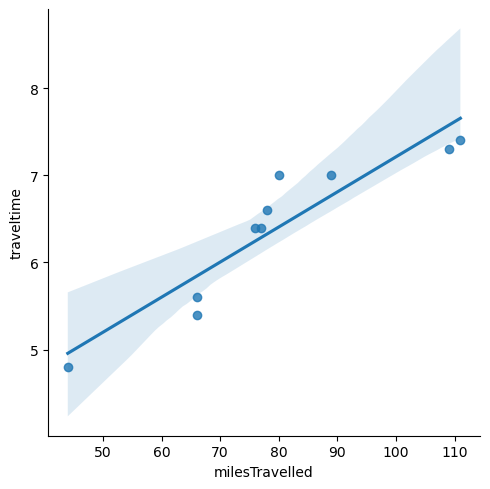

In [6]:
sns.lmplot(x='milesTravelled', y='traveltime', data=df)

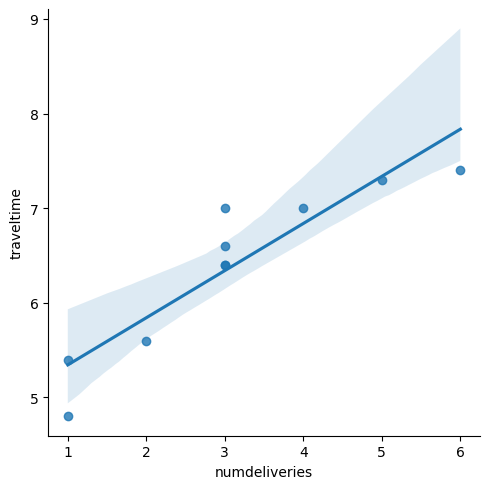

In [7]:
sns.lmplot(x='numdeliveries', y='traveltime', data=df)

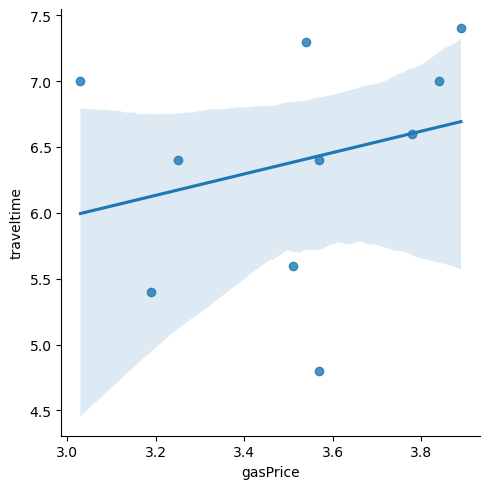

In [8]:
sns.lmplot(x='gasPrice', y='traveltime', data=df)


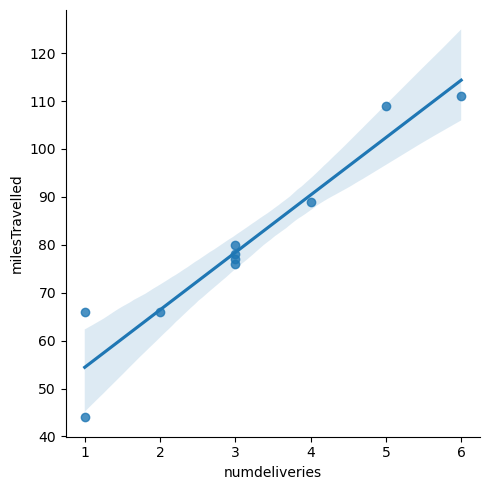

In [9]:
sns.lmplot(x='numdeliveries', y='milesTravelled', data=df) # multicollinearity

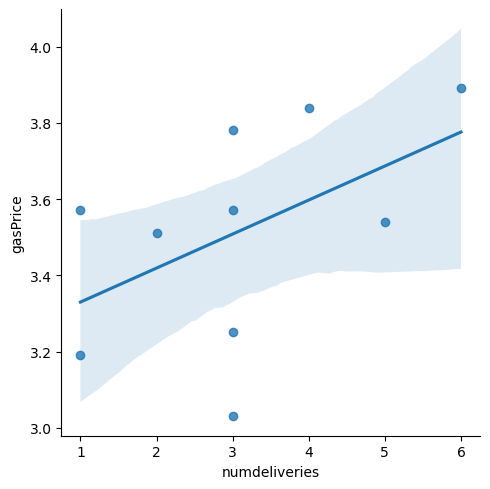

In [10]:
sns.lmplot(x='numdeliveries', y='gasPrice', data=df)

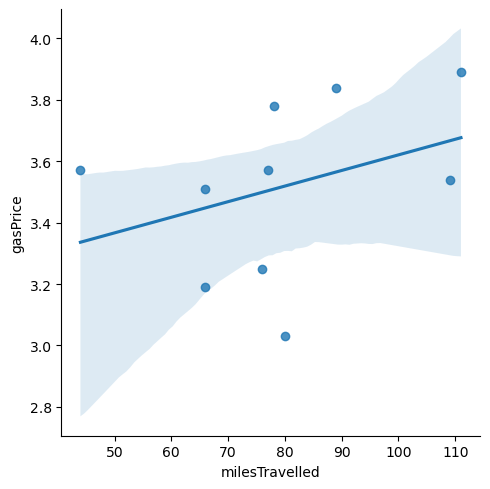

In [11]:
sns.lmplot(x='milesTravelled', y='gasPrice', data=df)

# conclusions for IV vs DV
- numdeliveries is positively correlated to traveltime
- milesTravelled is positively correlated to traveltime
- gasPrice is not correlated to traveltime conclusions for IV vs IV
- milesTravelled and numdeliveries are positively correlated and create multicollinearity problem


In [12]:
df.corr() # correlation matrix

,milesTravelled,numdeliveries,gasPrice,traveltime
milesTravelled,1.000000,0.955898,0.355796,0.928179
numdeliveries,0.955898,1.000000,0.498242,0.916443
gasPrice,0.355796,0.498242,1.000000,0.267212
traveltime,0.928179,0.916443,0.267212,1.000000


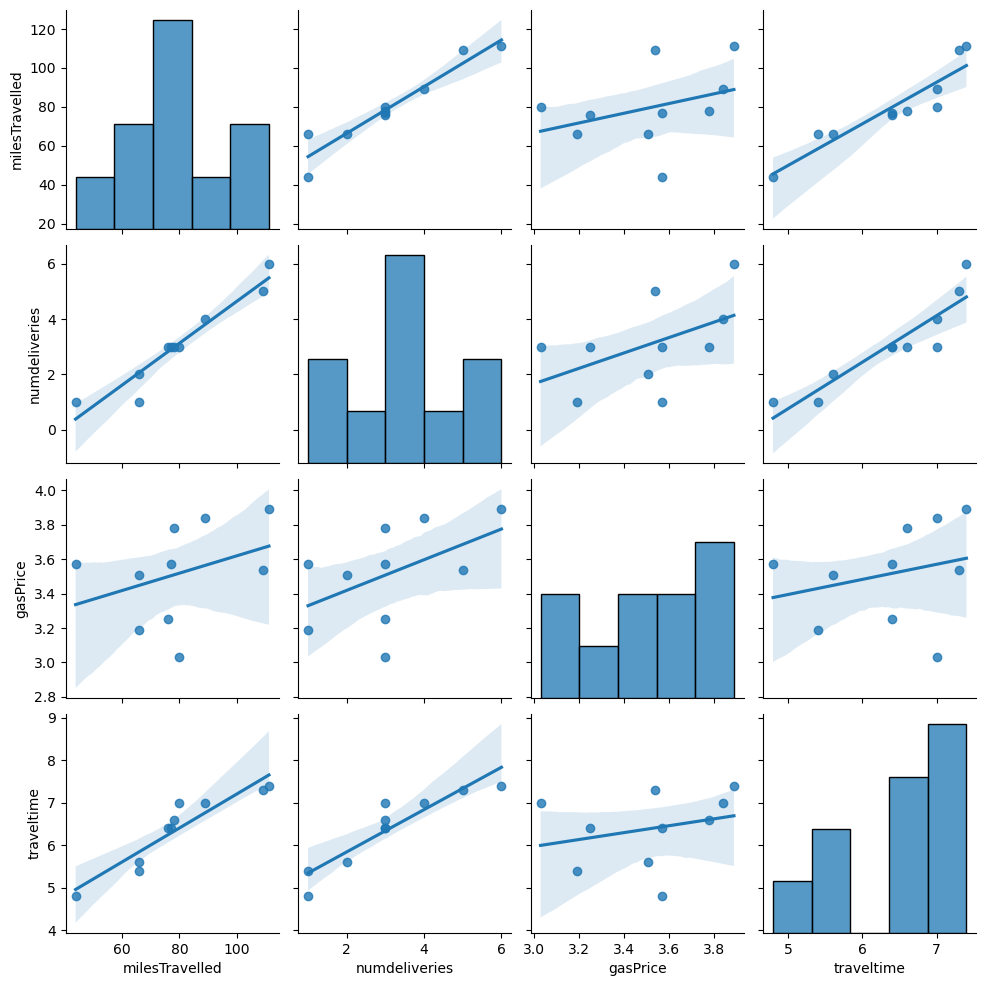

In [13]:
sns.pairplot(df,kind='reg' )

In [14]:

from statesmodel.formula.api import ols

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:

print(ols('traveltime ~ numdeliveries', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:             traveltime   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     41.96
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           0.000193
Time:                        18:47:32   Log-Likelihood:                -3.0794
No. Observations:                  10   AIC:                             10.16
Df Residuals:                       8   BIC:                             10.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.8454      0.265     18.261

c:\Users\Shambhavi\miniconda3\envs\ml12\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
print(ols('traveltime ~ milesTravelled', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:             traveltime   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     49.77
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           0.000107
Time:                        18:47:35   Log-Likelihood:                -2.3532
No. Observations:                  10   AIC:                             8.706
Df Residuals:                       8   BIC:                             9.312
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.1856      0.467      6.

c:\Users\Shambhavi\miniconda3\envs\ml12\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
print(ols('traveltime ~ gasPrice', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:             traveltime   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                    0.6151
Date:                Sat, 27 Aug 2022   Prob (F-statistic):              0.455
Time:                        18:47:40   Log-Likelihood:                -11.868
No. Observations:                  10   AIC:                             27.74
Df Residuals:                       8   BIC:                             28.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5365      3.649      0.969      0.3

c:\Users\Shambhavi\miniconda3\envs\ml12\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
model = ols('traveltime ~ milesTravelled', data=df).fit()
model.predict(pd.DataFrame({"milesTravelled": [50, 100, 150, 200]}))

0     5.198399
1     7.211238
2     9.224077
3    11.236916
dtype: float64